In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import cluster, mixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import kneighbors_graph

In [3]:
RANDOM_STATE = 45612

In [4]:
data = pd.read_csv('data/w_sample.csv', usecols=['x','y','z'])

# K-Means

In [5]:
def kmean_silhoutte_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        kmeans = cluster.KMeans(n_clusters=n_clu, random_state=rand_seed)
        kmeans.fit(data)
        clusters_clients = kmeans.predict(data)
        silhouette_avg = silhouette_score(data, clusters_clients)
        scores.append(silhouette_avg)
    plt.plot(n_clusters, scores)
    return scores

[0.2725951346734955,
 0.26719505324321474,
 0.2529586772549836,
 0.27601571324674656,
 0.28090088996265805,
 0.26004916722733795,
 0.26943103942625957,
 0.2721741491570546,
 0.26439977461749375]

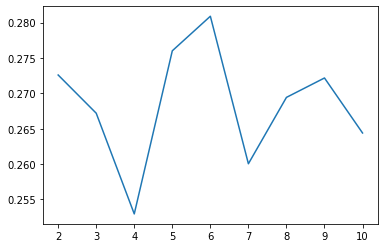

In [6]:
kmeans_sli_scores = kmean_silhoutte_score(data)
kmeans_sli_scores

In [7]:
def kmean_calinski_score(data, rand_seed=RANDOM_STATE):
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        kmeans = cluster.KMeans(n_clusters=n_clu, random_state=rand_seed)
        kmeans.fit(data)
        clusters_clients = kmeans.predict(data)
        cal_scores = calinski_harabasz_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[35.32997636600141,
 37.54148450833889,
 37.2034664768922,
 37.169202189196824,
 37.22010162534351,
 34.62032745649991,
 34.28868597199044,
 32.780750930083734,
 32.03521173473435]

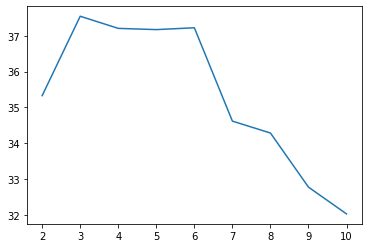

In [8]:
kmean_cal_scores = kmean_calinski_score(data)
kmean_cal_scores

In [9]:
def kmean_davies_score(data, rand_seed=RANDOM_STATE):
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        kmeans = cluster.KMeans(n_clusters=n_clu, random_state=rand_seed)
        kmeans.fit(data)
        clusters_clients = kmeans.predict(data)
        cal_scores = davies_bouldin_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[1.4182788834628297,
 1.1886002138033924,
 1.1916676337939434,
 1.062658985420883,
 0.9976004970387754,
 1.0800281379141627,
 1.039422705340526,
 1.0203127886584307,
 0.9861646847892345]

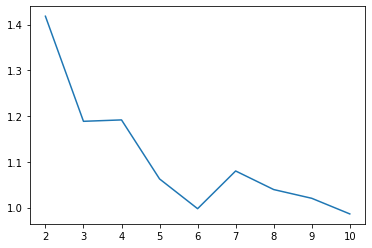

In [10]:
kmean_dav_scores = kmean_davies_score(data)
kmean_dav_scores

# GMM

In [11]:
def gmm_silhoutte_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        model = mixture.GaussianMixture(n_components=n_clu, covariance_type='full')
        model.fit(data)
        clusters_clients = model.predict(data)
        silhouette_avg = silhouette_score(data, clusters_clients)
        scores.append(silhouette_avg)
    plt.plot(n_clusters, scores)
    return scores

[0.2576346242105219,
 0.25875501929280215,
 0.1912992052114328,
 0.15030687819503943,
 0.15266341259690897,
 0.23019044762092097,
 0.15535096740796628,
 0.181566163089305,
 0.0747880779670365]

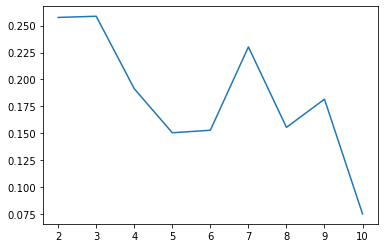

In [12]:
gmm_sil_score = gmm_silhoutte_score(data)
gmm_sil_score

In [13]:
def gmm_calinski_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        model = mixture.GaussianMixture(n_components=n_clu, covariance_type='full')
        model.fit(data)
        clusters_clients = model.predict(data)
        cal_scores = calinski_harabasz_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[24.550200411960446,
 32.89293646183229,
 21.851082412278547,
 21.208186821892866,
 25.488761141541083,
 19.846354665046988,
 19.321830107669037,
 22.643315335138524,
 23.135714697475198]

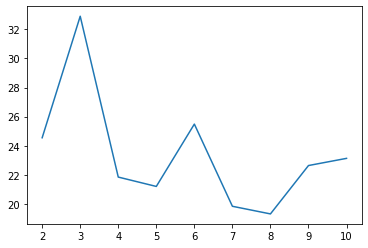

In [14]:
gmm_cal_score = gmm_calinski_score(data)
gmm_cal_score

In [15]:
def gmm_davies_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    n_clusters = np.arange(2,11)

    for n_clu in n_clusters:
        model = mixture.GaussianMixture(n_components=n_clu, covariance_type='full')
        model.fit(data)
        clusters_clients = model.predict(data)
        cal_scores = davies_bouldin_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[1.4553308963546572,
 1.258557498352933,
 1.3887041068337207,
 1.2396564976159132,
 1.312106594190575,
 1.6797565794303655,
 1.4514506110928789,
 1.3100432494448606,
 1.4488299205896171]

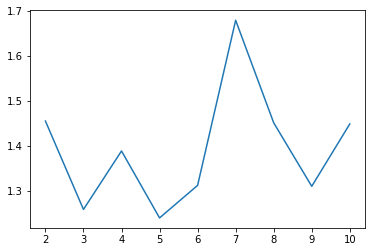

In [16]:
gmm_dav_scores = gmm_davies_score(data)
gmm_dav_scores

# Ward Aglomerative Clustering

In [17]:
def ward_agg_clustering_silhoutte_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    
    n_clusters = np.arange(2,11)
    for n_clu in n_clusters:
        model = cluster.AgglomerativeClustering(n_clusters=n_clu, linkage='ward')
        model.fit(data)
        clusters_clients = model.labels_.astype(int)
        silhouette_avg = silhouette_score(data, clusters_clients)
        scores.append(silhouette_avg)
    plt.plot(n_clusters, scores)
    return scores

[0.23807919555625143,
 0.22379721251800874,
 0.23505032101986365,
 0.21838109103561573,
 0.2211416817899879,
 0.2063686789847449,
 0.21754835891600766,
 0.22760123037615101,
 0.24124716569302124]

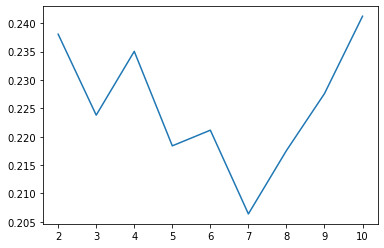

In [18]:
ward_sil_score = ward_agg_clustering_silhoutte_score(data)
ward_sil_score

In [19]:
def ward_agg_clustering_calinski_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    
    n_clusters = np.arange(2,11)
    for n_clu in n_clusters:
        model = cluster.AgglomerativeClustering(n_clusters=n_clu, linkage='ward')
        model.fit(data)
        clusters_clients = model.labels_.astype(int)
        cal_scores = calinski_harabasz_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[29.472907360489582,
 33.11564248392706,
 31.32827662436169,
 30.242467981693387,
 29.996413563586234,
 28.68827790437864,
 28.345064732218606,
 28.571254925600538,
 29.19712239845603]

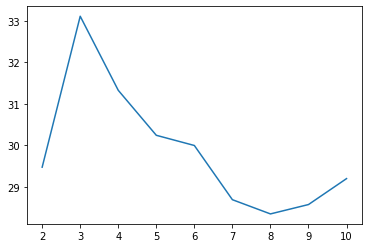

In [20]:
ward_cal_score = ward_agg_clustering_calinski_score(data)
ward_cal_score

In [21]:
def ward_agg_clustering_davies_score(data, rand_seed=RANDOM_STATE):    
    scores = []
    
    n_clusters = np.arange(2,11)
    for n_clu in n_clusters:
        model = cluster.AgglomerativeClustering(n_clusters=n_clu, linkage='ward')
        model.fit(data)
        clusters_clients = model.labels_.astype(int)
        cal_scores = davies_bouldin_score(data, clusters_clients)
        scores.append(cal_scores)
    plt.plot(n_clusters, scores)
    return scores

[1.5413427258945709,
 1.2298090765555512,
 1.1897687134801789,
 1.2979935991180487,
 1.2152162253276486,
 1.1829784282682427,
 1.1298134374524866,
 1.0895714301768509,
 1.067907106726357]

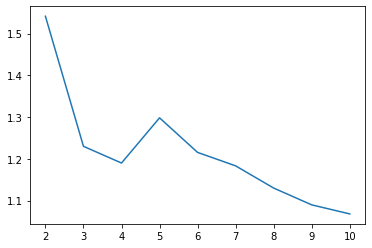

In [22]:
ward_dav_scores = ward_agg_clustering_davies_score(data)
ward_dav_scores

# Results:

In [23]:
def cluster_table(sil, cal, dav):
    base = pd.DataFrame(sil, columns=['silhouette']).set_index(np.arange(2,11))
    base['calinski_harabasz'] = cal
    base['davies_bouldin'] = dav
    return base

In [24]:
kmean_scores = cluster_table(kmeans_sli_scores, kmean_cal_scores, kmean_dav_scores)
kmean_scores

,silhouette,calinski_harabasz,davies_bouldin
2,0.272595,35.329976,1.418279
3,0.267195,37.541485,1.188600
4,0.252959,37.203466,1.191668
5,0.276016,37.169202,1.062659
6,0.280901,37.220102,0.997600
7,0.260049,34.620327,1.080028
8,0.269431,34.288686,1.039423
9,0.272174,32.780751,1.020313
10,0.264400,32.035212,0.986165


In [31]:
kmean_scores.to_csv('data/res_kmeans.csv')

In [25]:
gmm_scores = cluster_table(gmm_sil_score, gmm_cal_score, gmm_dav_scores)
gmm_scores

,silhouette,calinski_harabasz,davies_bouldin
2,0.257635,24.550200,1.455331
3,0.258755,32.892936,1.258557
4,0.191299,21.851082,1.388704
5,0.150307,21.208187,1.239656
6,0.152663,25.488761,1.312107
7,0.230190,19.846355,1.679757
8,0.155351,19.321830,1.451451
9,0.181566,22.643315,1.310043
10,0.074788,23.135715,1.448830


In [28]:
gmm_scores.to_csv('data/res_gmm.csv')

In [26]:
ward_scores = cluster_table(ward_sil_score, ward_cal_score, ward_dav_scores)
ward_scores

,silhouette,calinski_harabasz,davies_bouldin
2,0.238079,29.472907,1.541343
3,0.223797,33.115642,1.229809
4,0.235050,31.328277,1.189769
5,0.218381,30.242468,1.297994
6,0.221142,29.996414,1.215216
7,0.206369,28.688278,1.182978
8,0.217548,28.345065,1.129813
9,0.227601,28.571255,1.089571
10,0.241247,29.197122,1.067907


In [30]:
ward_scores.to_csv('data/res_ward.csv')